## Student Performance Predictor

In [35]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
import matplotlib.pyplot as plt
import pickle

In [37]:
data.head()

,G1,G2,G3,studytime,health,famrel,failures,absences
0,5,6,6,2,3,4,0,6
1,5,5,6,2,3,5,0,4
2,7,8,10,2,3,4,3,10
3,15,14,15,3,5,3,0,2
4,6,10,10,2,5,4,0,4


In [39]:
predict = "G3"

In [41]:
data = data[[ "G1", "G2", "G3", "studytime", "health", "famrel", "failures", "absences"]]

In [43]:
x = np.array(data.drop(columns=[predict]))
y = np.array(data[predict])

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.1)

In [47]:
print(x_train.shape, x_test.shape, y_test.shape)

(355, 7) (40, 7) (40,) (40,)


In [49]:
linear = linear_model.LinearRegression()
linear.fit(x_train, y_train)
acc = linear.score(x_test, y_test)
print("Accuracy (R-squared):", acc)

Accuracy (R-squared): 0.7798822732240082


In [53]:
# Save the trained model to a file
with open("studentgrades.pickle", "wb") as f:
    pickle.dump(linear, f)

print("Model saved to studentgrades.pickle")
# --- END OF ADDED CODE ---

# # Your existing code continues here...
# acc = linear.score(x_test, y_test)
# print("Accuracy (R-squared):", acc)

Model saved to studentgrades.pickle


In [55]:
print('Coefficient (weights for each feature): \n', linear.coef_)
print('Intercept (the starting value): \n', linear.intercept_)

Coefficient (weights for each feature): 
 [ 0.15081041  0.96744169 -0.20173462  0.08997162  0.31314211 -0.43196173
  0.04010763]
Intercept (the starting value): 
 -2.8413622742292546


In [57]:
predictions = linear.predict(x_test)

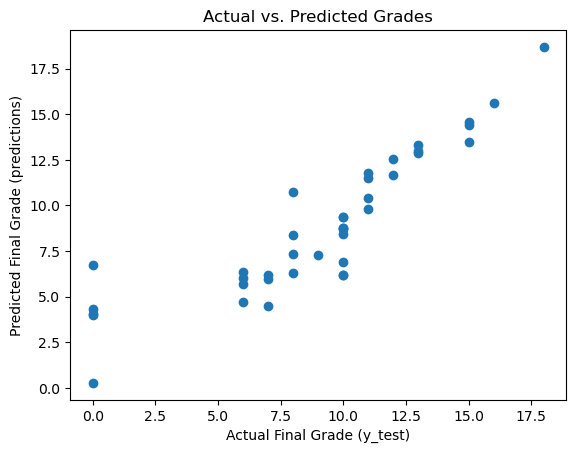

In [59]:
plt.scatter(y_test, predictions)
plt.xlabel("Actual Final Grade (y_test)")
plt.ylabel("Predicted Final Grade (predictions)")
plt.title("Actual vs. Predicted Grades")
plt.show()

In [ ]:
# print("--- Student Performance Predictor ---")
print("Please enter the following information:")

g1 = int(input("First period grade (G1) (0-20): "))
g2 = int(input("Second period grade (G2) (0-20): "))
studytime = int(input("Weekly study time (1-4): "))
health = int(input("Current health status (1-5): "))
famrel = int(input("Quality of family relationships (1-5): "))
failures = int(input("Number of past class failures (0-4): "))
absences = int(input("Number of school absences (0-93): "))

user_data = np.array([[g1, g2, studytime, health, famrel, failures, absences]])
predicted_score = linear.predict(user_data)

print("---------------------------------")
print(f"Predicted Final Score (G3): {predicted_score[0]:.2f}") 

if predicted_score[0] >= 10:
    print("Prediction: You will PASS!")
else:
    print("Prediction: You are at risk of FAILING.")

Please enter the following information:
